In [54]:
# поклюячаем требуемые библиотеки
import numpy as np
from IPython.display import display
from PIL import Image

In [55]:
# определяем функцию расплющивания
def squashing(img, matrix):
    dim = w, h = img.size
    newImg = Image.new(img.mode, dim)
    for x in range(h):
        for y in range(w):
            newXY = np.array([[x, y]]).dot(matrix)
            newX, newY = newXY[0][0] % h, newXY[0][1] % h
            newImg.putpixel((newX, h - newY - 1), img.getpixel((x, h - y - 1)))
    return newImg


In [56]:
# выполняем расплющивания steps итераций. Если displaySteps = true - выводим изображение на каждой итерации
def step_squashing(img, step):
    matrix = np.array([[1, 1], [1, 2]])
    matr_pow = np.linalg.matrix_power(matrix, step)
    newImg = squashing(img, matr_pow)
   
    return newImg


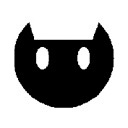

In [51]:
# загружаем и выводим изображение
#image = Image.open('cat.jpg')
image = Image.open('arnoldscat.jpg')
display(image)

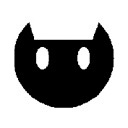

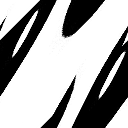

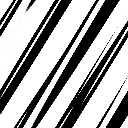

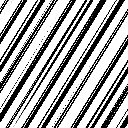

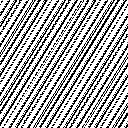

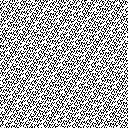

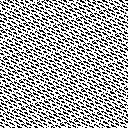

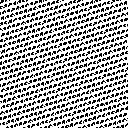

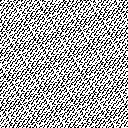

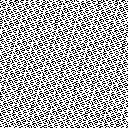

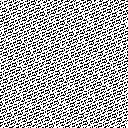

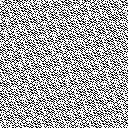

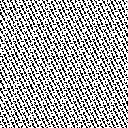

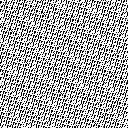

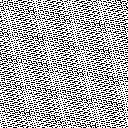

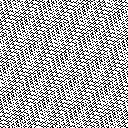

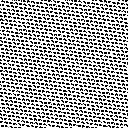

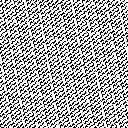

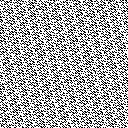

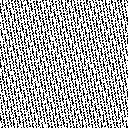

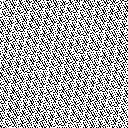

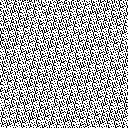

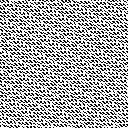

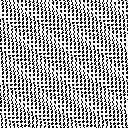

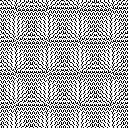

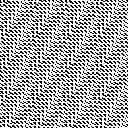

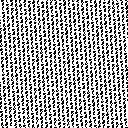

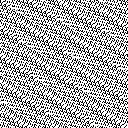

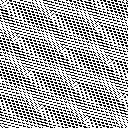

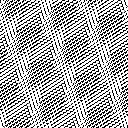

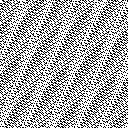

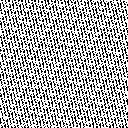

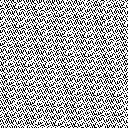

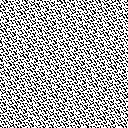

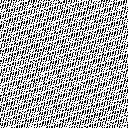

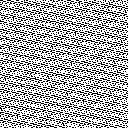

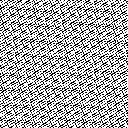

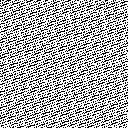

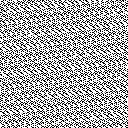

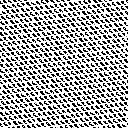

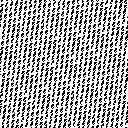

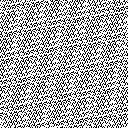

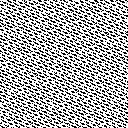

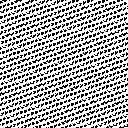

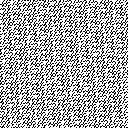

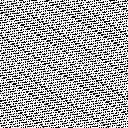

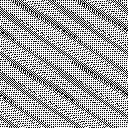

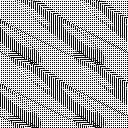

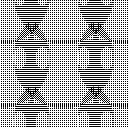

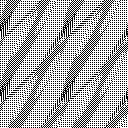

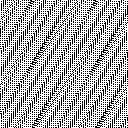

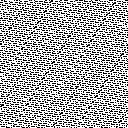

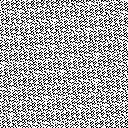

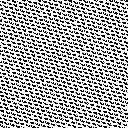

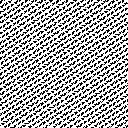

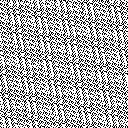

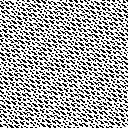

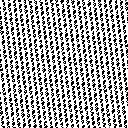

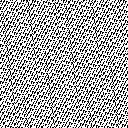

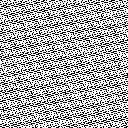

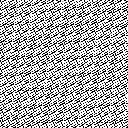

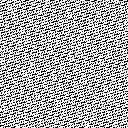

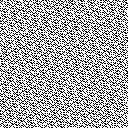

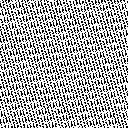

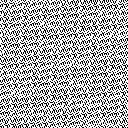

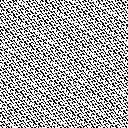

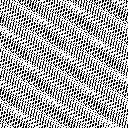

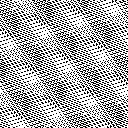

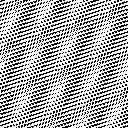

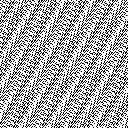

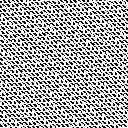

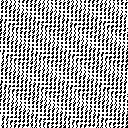

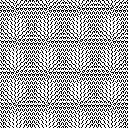

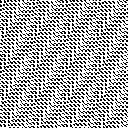

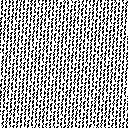

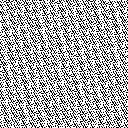

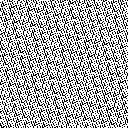

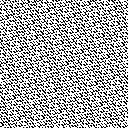

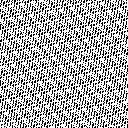

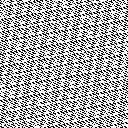

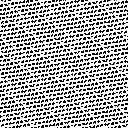

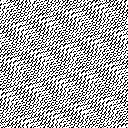

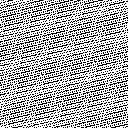

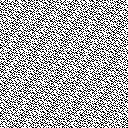

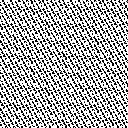

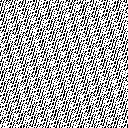

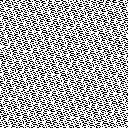

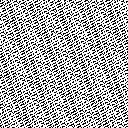

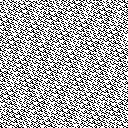

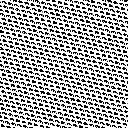

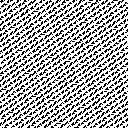

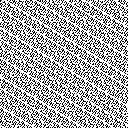

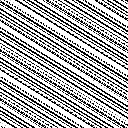

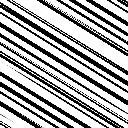

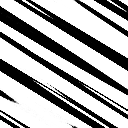

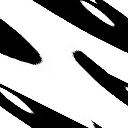

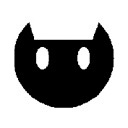

In [64]:
for i in range(0, 97):
    img = step_squashing(image, i)
    display(img)


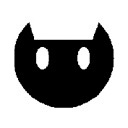

In [62]:
# череез 96 шагов кот "возвращается"
squashImg = step_squashing(image, 96)
display(squashImg)


In [ ]:
#Асимптотика step_squashing:
# возведение матрицы в степень O(log(steps))
# обработка изображения O(w*h) - w, h кол-во точек по горизонтали и вертикали
# Следовательно, итоговая ассимптотика step_squashing:
# O(log(steps) + w*h)
# если выводить изображение на каждом шаге, то
# O(steps*(log(steps) + w*h))
